# Ablation on best model

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from types import SimpleNamespace

import numpy as np

import dataset_utils
import helpers
import train_utils
from implementations import (
    ridge_regression,
    reg_logistic_regression_sgd,
)

In [7]:
N_DIM = 0
D_DIM = 1

Define hyperprameter domains

In [37]:
config = SimpleNamespace(
    seed=270404,
    sub_sample=False,
    algorithm=ridge_regression,
    algorithm_hyperparams=dict(
        lambda_=[1e-7],
        max_iters=[1],
        gamma=[1.],
    ),
    preconditioning_hyperparams=dict(
        categorical_subsets=[
            [[0], [1], [2, 3]],
        ],
        standardize=[True],
        nan_threshold_ratio=[0.5],
        nan_replacement_type=["median"],
        extrema_clip_percentage=[1],
        non_informative_threshold=[0.05],
    ),
    feature_augmentation_hyperparams=dict(
        feature_augmentation=[True],
        poly_max_degree=[12],
        ihs=[True],
        sine=[True],
        sinh=[True],
        cosine=[True],
        cosh=[True],
        exp=[True],
        abs=[True],
    ),
    k_fold=10,
)

In [14]:
# Data loading.
y_train, x_train, ids_train = helpers.load_csv_data(
    "../data/train.csv", sub_sample=config.sub_sample
)
_, x_test, ids_test = helpers.load_csv_data(
    "../data/test.csv", sub_sample=config.sub_sample
)
y_train = dataset_utils.from_11_to_01(y_train)

In [38]:
# Train a model.
results = train_utils.hyperparameter_sweep(y_train, x_train, config)

train_utils.save_hyperparameter_sweep_results(
    algorithm=config.algorithm,
    results=results,
    output_dir="../results/ablation/non_informative",
)

# Find the best hyperparameters.
(
    best_hyperparams,
    best_mean_accuracy,
) = train_utils.pick_best_hyperparameters(results)
print(
    f"Algorithm: {config.algorithm.__name__}\n"
    f"Best sweep accuracy: {best_mean_accuracy}.\n"
    f"Obtained for hyperparameters: {best_hyperparams}."
)

  0%|          | 0/1 [00:00<?, ?it/s]/Users/skander/courses/epfl/ml-project-1-lms/preprocessing.py:40: RuntimeWarning: invalid value encountered in divide
  tx_train = (tx_train - train_mean) / train_std
/Users/skander/courses/epfl/ml-project-1-lms/preprocessing.py:41: RuntimeWarning: invalid value encountered in divide
  tx_test = (tx_test - train_mean) / train_std
100%|██████████| 1/1 [00:53<00:00, 53.25s/it]

Algorithm: ridge_regression
Best sweep accuracy: 0.794548.
Obtained for hyperparameters: {'lambda_': 1e-07, 'categorical_subsets': [[0], [1], [2, 3]], 'standardize': True, 'nan_threshold_ratio': 0.5, 'nan_replacement_type': 'median', 'extrema_clip_percentage': 1, 'non_informative_threshold': -1, 'feature_augmentation': True, 'poly_max_degree': 12, 'ihs': True, 'sine': True, 'sinh': True, 'cosine': True, 'cosh': True, 'exp': True, 'abs': True, 'seed': 270404, 'test_accuracies': [0.79356, 0.79532, 0.80032, 0.79324, 0.79804, 0.78848, 0.79176, 0.79464, 0.79216, 0.79796]}.


## Get ablation boxplot

Put all the generated '.pkl' files in the following directory: `"../results/ablation"`

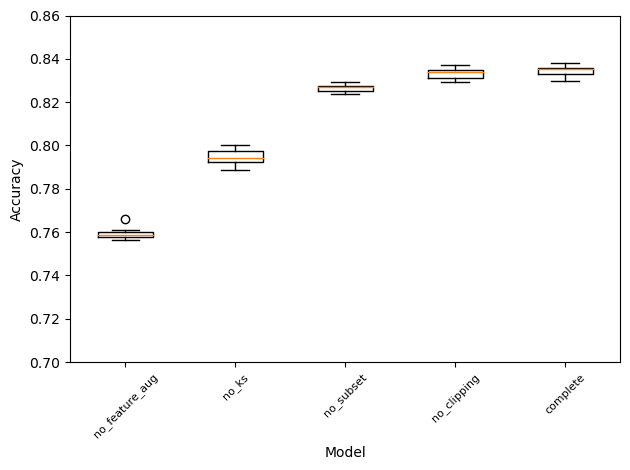

In [18]:
import plots
import os

ablation_dir = "../results/ablation"
paths_to_models = []
for filename in os.listdir(ablation_dir):
    if filename[-4:] == '.pkl':
        paths_to_models.append(os.path.join(ablation_dir, filename))

output_path = "../figures/ablations.png"


plots.plot_models_accuracy(
    paths_to_models=paths_to_models, 
    output_path=output_path,
    x_label_rotation=45,
    y_range=[0.7, 0.86]
    )